Q.9. Write a program to read the data from the following link, perform data analysis and answer the following questions

Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD 

Insights to be drawn -

- Get all the cars and their types that do not qualify for clean alternative fuel vehicle. 

- Get all TESLA cars with the model year, and model type made in Bothell City.

- Get all the cars that have an electric range of more than 100, and were made after 2015.

- Draw plots to show the distribution between city and electric vehicle type

**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV data from the given link**

In [3]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [4]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

**Get all the cars and their types that do not qualify for clean alternative fuel vehicle**

In [6]:
non_clean_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] != "Clean Alternative Fuel Vehicle Eligible"]
non_clean_cars_info = non_clean_cars[["Make", "Model"]]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
non_clean_cars_info.head()

Cars and their types that do not qualify for clean alternative fuel vehicle:


,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
11,TESLA,MODEL Y
14,FORD,C-MAX


In [7]:
non_clean_cars_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69892 entries, 6 to 130442
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Make    69892 non-null  object
 1   Model   69670 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


**Get all TESLA cars with the model year, and model type made in Bothell City**

In [9]:
data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")][["Model Year", "Electric Vehicle Type"]]

,Model Year,Electric Vehicle Type
39,2020,Battery Electric Vehicle (BEV)
217,2022,Battery Electric Vehicle (BEV)
218,2022,Battery Electric Vehicle (BEV)
222,2018,Battery Electric Vehicle (BEV)
292,2017,Battery Electric Vehicle (BEV)
...,...,...
129778,2019,Battery Electric Vehicle (BEV)
129954,2021,Battery Electric Vehicle (BEV)
129976,2014,Battery Electric Vehicle (BEV)
130295,2022,Battery Electric Vehicle (BEV)


**Get all the cars that have an electric range of more than 100 and were made after 2015**

In [10]:
data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)][["Make", "Model", "Model Year"]]

,Make,Model,Model Year
0,TESLA,MODEL X,2018
2,TESLA,MODEL 3,2019
4,TESLA,MODEL S,2017
12,TESLA,MODEL 3,2020
13,TESLA,MODEL 3,2020
...,...,...,...
130417,TESLA,MODEL Y,2020
130428,NISSAN,LEAF,2018
130432,TESLA,MODEL Y,2020
130436,TESLA,MODEL 3,2018


**Draw plots to show the distribution between city and electric vehicle type**

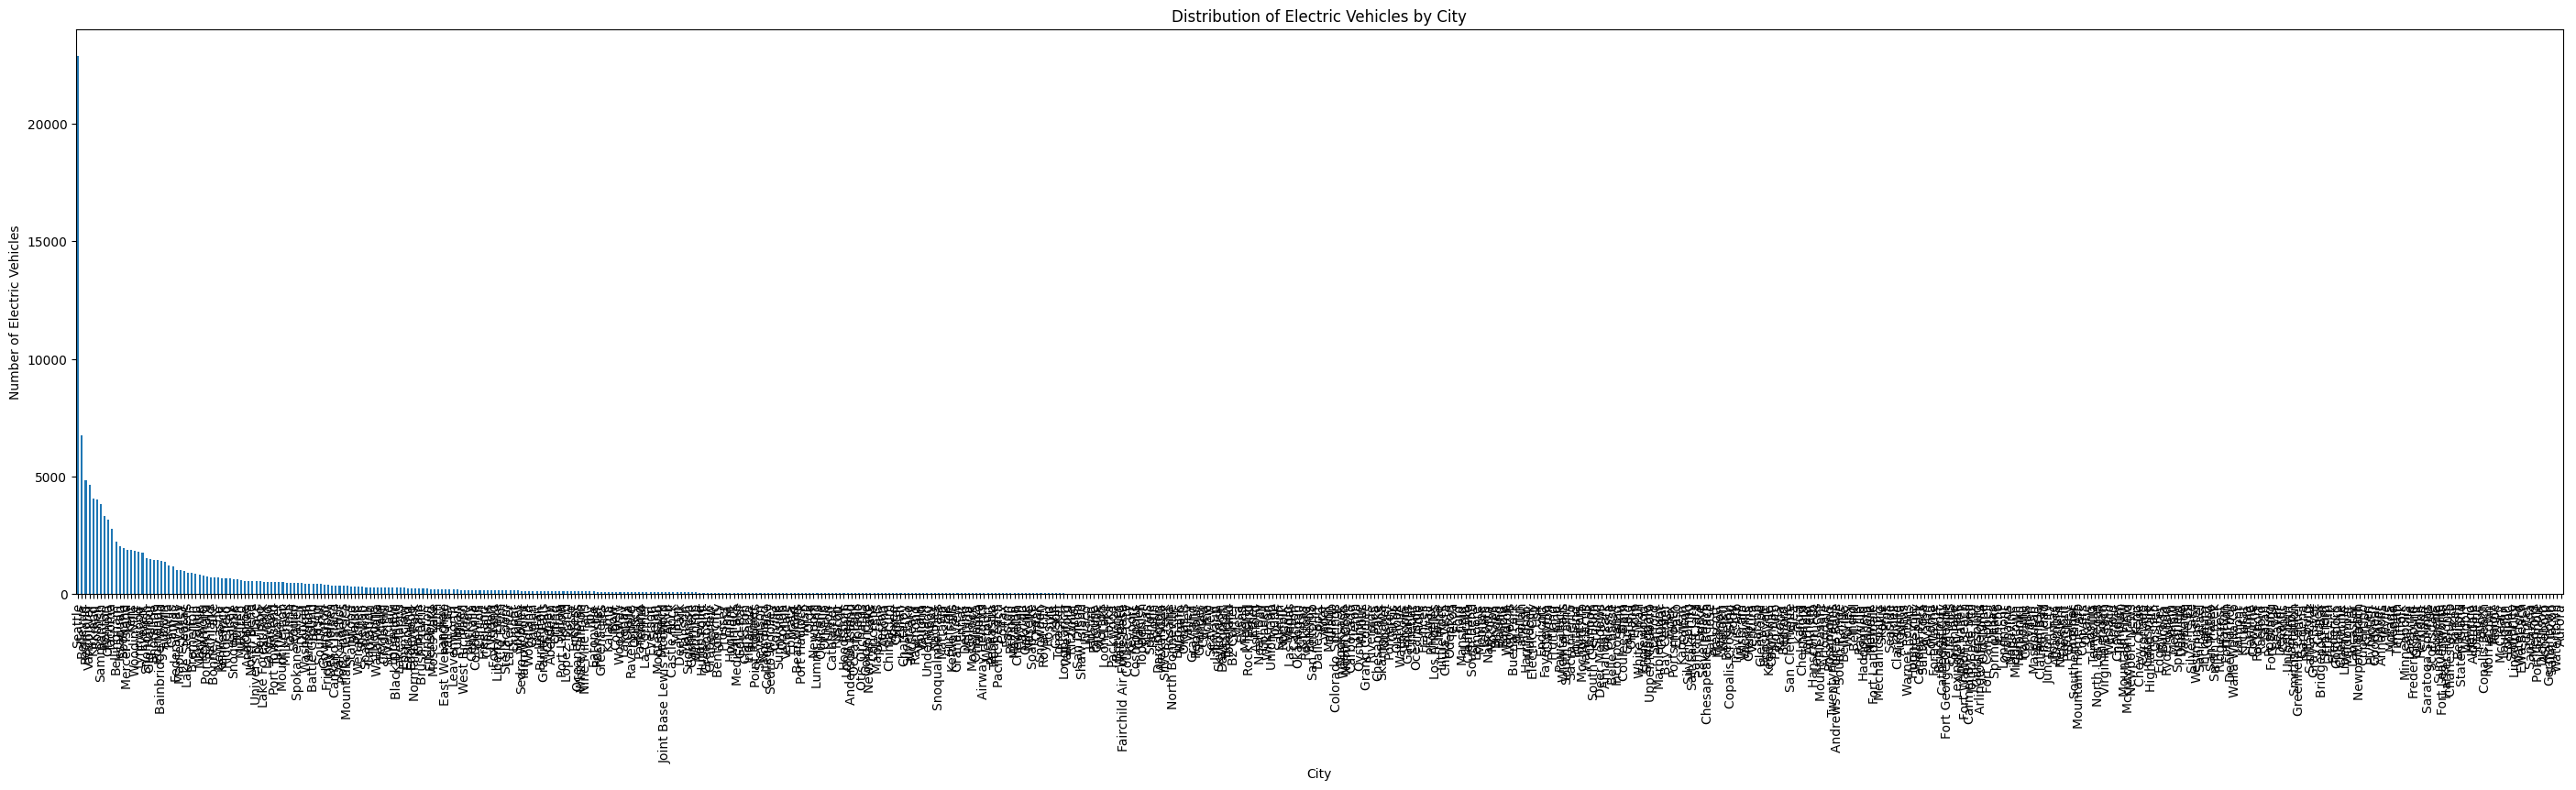

In [12]:
plt.figure(figsize=(35, 8))
data["City"].value_counts().plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Number of Electric Vehicles")
plt.title("Distribution of Electric Vehicles by City")
plt.show()

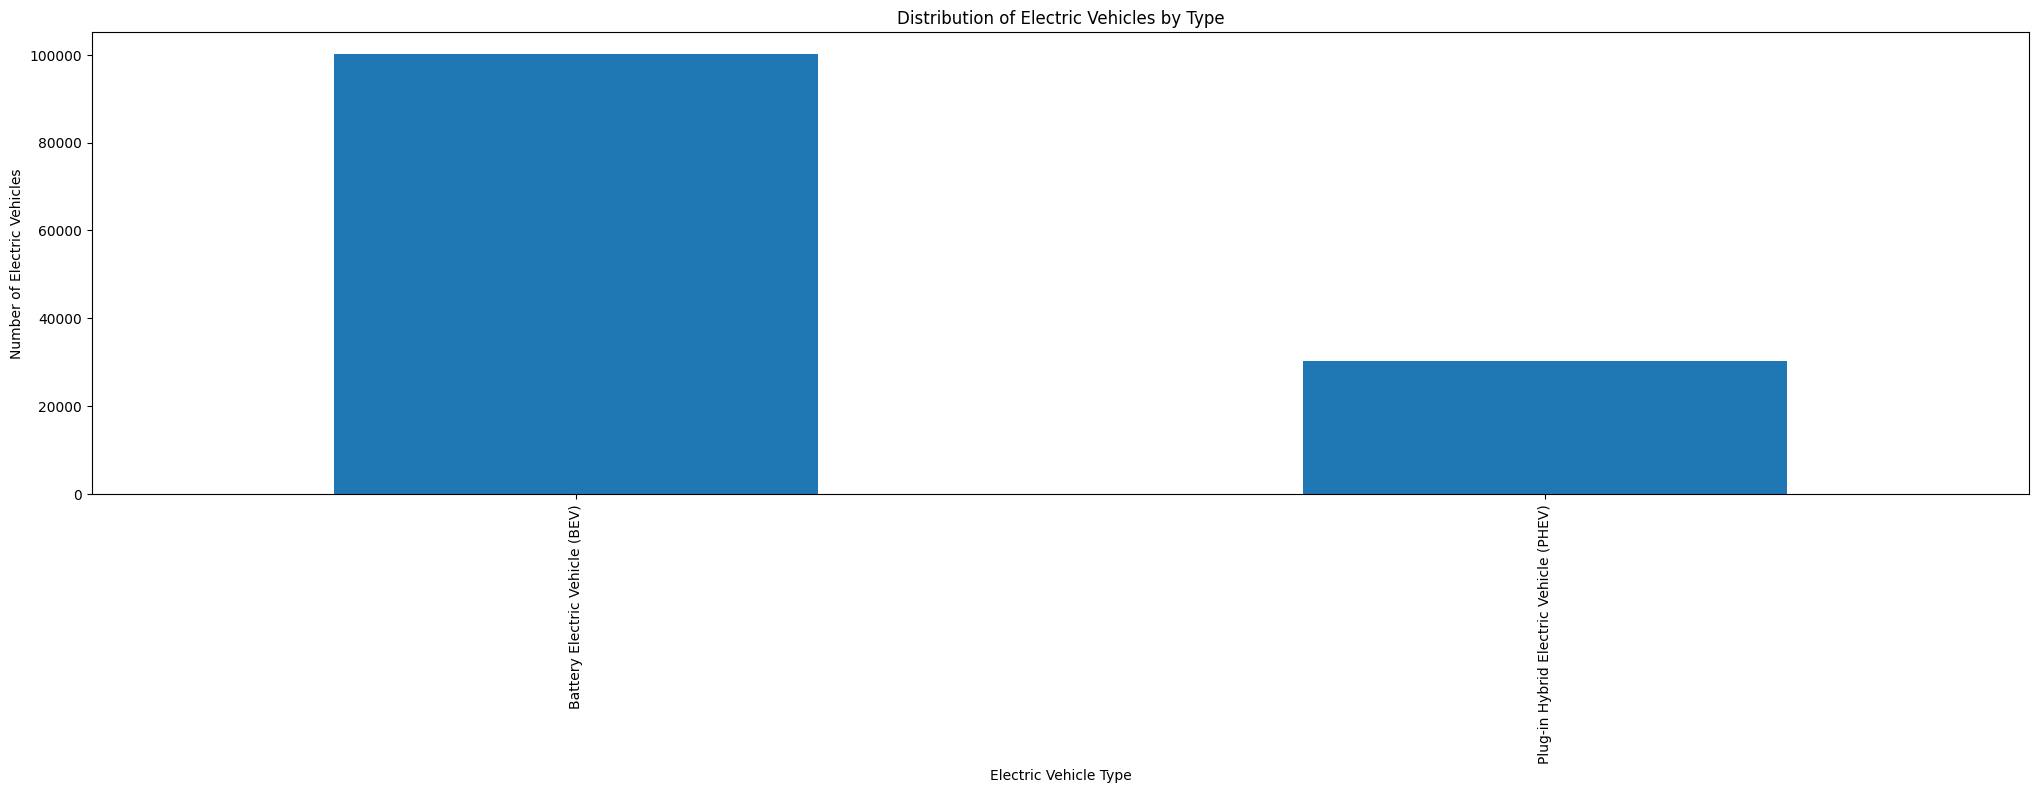

In [13]:
plt.figure(figsize=(25,6))
data["Electric Vehicle Type"].value_counts().plot(kind="bar")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Number of Electric Vehicles")
plt.title("Distribution of Electric Vehicles by Type")
plt.show()